In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
tic = '39174351'
#tic = '100013600'

search = lk.search_lightcurve(f'TIC {tic}', author='SPOC', exptime=120)
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 22,2020,SPOC,120,39174351,0.0
1,TESS Sector 49,2022,SPOC,120,39174351,0.0


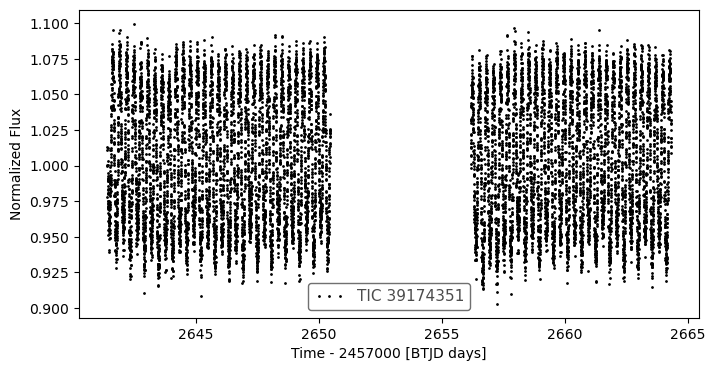

In [89]:
lc = search[1].download().normalize().remove_outliers(sigma=3.5)
#lc = search.download_all().stitch().remove_outliers(sigma=3.5)

fig, ax = plt.subplots(figsize=(8,4))
lc.plot(ax=ax, linewidth=0, marker='o', color='k', markersize=1)
plt.show()

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

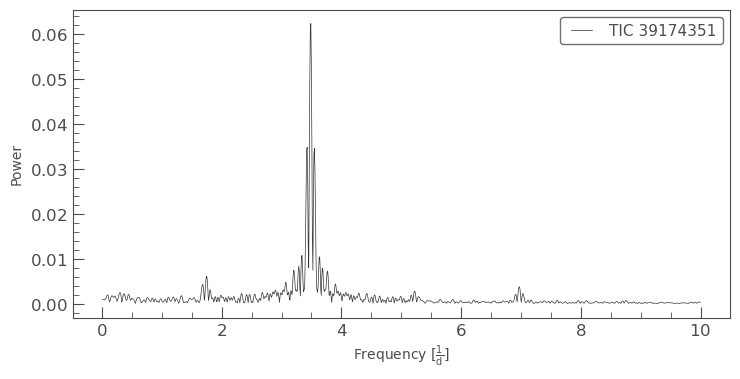

In [92]:
pg = lc.to_periodogram(maximum_frequency=10)
pg.plot()

C:\Users\jcfis\anaconda3\lib\site-packages\astropy\units\quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

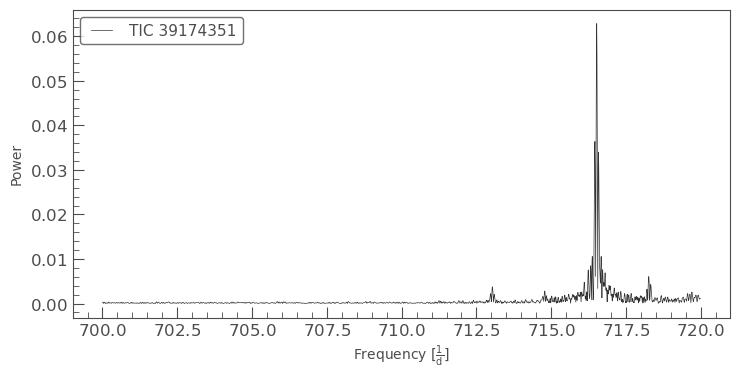

In [91]:
pg0 = lc.to_periodogram(minimum_frequency=700, maximum_frequency=720)
pg0.plot()

In [68]:
len(pg.frequency)

191029

In [33]:
sorted(pg.power, reverse=True)

[<Quantity 0.06239832>,
 <Quantity 0.06084372>,
 <Quantity 0.05346011>,
 <Quantity 0.04923027>,
 <Quantity 0.03607108>,
 <Quantity 0.03482587>,
 <Quantity 0.03457829>,
 <Quantity 0.03396088>,
 <Quantity 0.03338228>,
 <Quantity 0.03017559>,
 <Quantity 0.02905837>,
 <Quantity 0.02777118>,
 <Quantity 0.02700479>,
 <Quantity 0.02403413>,
 <Quantity 0.01979218>,
 <Quantity 0.01715968>,
 <Quantity 0.0143411>,
 <Quantity 0.01290282>,
 <Quantity 0.01073199>,
 <Quantity 0.01041514>,
 <Quantity 0.01021885>,
 <Quantity 0.01020208>,
 <Quantity 0.01008908>,
 <Quantity 0.00862757>,
 <Quantity 0.00836668>,
 <Quantity 0.00802632>,
 <Quantity 0.00802559>,
 <Quantity 0.00786971>,
 <Quantity 0.00783508>,
 <Quantity 0.00751566>,
 <Quantity 0.00746619>,
 <Quantity 0.00741308>,
 <Quantity 0.0074003>,
 <Quantity 0.00736084>,
 <Quantity 0.00730091>,
 <Quantity 0.00725136>,
 <Quantity 0.00703293>,
 <Quantity 0.00677239>,
 <Quantity 0.00672398>,
 <Quantity 0.00632608>,
 <Quantity 0.00605799>,
 <Quantity 0.00604

In [34]:
pg.to_table()

frequency,period,power
1 / d,d,
float64,float64,float64
0.008723115686395291,114.63793854753247,0.0009671667383598905
0.017446231372790583,57.318969273766236,0.0009529439890699255
0.026169347059185874,38.212646182510824,0.0009215983270739145
0.034892462745581165,28.659484636883118,0.000866325801586297
0.04361557843197646,22.927587709506497,0.0008108914422533177
0.05233869411837175,19.106323091255412,0.0008956971448034582
0.06106180980476704,16.37684836393321,0.0010942154085977517
0.06978492549116233,14.329742318441559,0.0012623221915378988


In [69]:
df_freq = pd.DataFrame(pg.frequency, columns=['Freq'])
df_power = pd.DataFrame(pg.power, columns=['Power'])
table = pd.concat([df_freq, df_power], axis=1)

table

,Freq,Power
0,0.000262,0.000443
1,0.000523,0.000441
2,0.000785,0.000438
3,0.001047,0.000432
4,0.001309,0.000348
...,...,...
191024,49.998841,0.000172
191025,49.999103,0.000125
191026,49.999364,0.000093
191027,49.999626,0.000131


In [36]:
sorted(table.Power, reverse=True)[0]

0.06239832293650464

In [48]:
freq_index = table[table['Power'] == sorted(table.Power, reverse=True)[0]].index
print(freq_index[0])
print(table.Freq[freq_index[0]])
print(sorted(table.Power, reverse=True)[0])

399
3.4892462745581168
0.06239832293650464


In [49]:
for i in range(len(table)):
    if table.Power[i] == sorted(table.Power, reverse=True)[0]:
        print(i, table.Freq[i])

399 3.4892462745581168


In [64]:
power_list = []
freq_list = []

for i in range(5):
    freq_index = table[table['Power'] == sorted(table.Power, reverse=True)[i]].index
    freq_list.append(table.Freq[freq_index[0]])
    power_list.append(sorted(table.Power, reverse=True)[i])
    
main_freq = pd.DataFrame(freq_list, columns=['Freq'])
main_power = pd.DataFrame(power_list, columns=['Power'])
main_table = pd.concat([main_freq, main_power], axis=1)

main_table

,Freq,Power
0,3.489246,0.062398
1,3.480523,0.060844
2,3.497969,0.053460
3,3.471800,0.049230
4,3.506693,0.036071


In [70]:
power_list = []
freq_list = []

for i in range(5):
    freq_index = table[table['Power'] == sorted(table.Power, reverse=True)[i]].index
    freq_list.append(table.Freq[freq_index[0]])
    power_list.append(sorted(table.Power, reverse=True)[i])
    
main_freq = pd.DataFrame(freq_list, columns=['Freq'])
main_power = pd.DataFrame(power_list, columns=['Power'])
merged_table = pd.concat([main_freq, main_power], axis=1)

merged_table

,Freq,Power
0,3.486112,0.064732
1,3.484803,0.064367
2,3.487421,0.064187
3,3.483495,0.063101
4,3.488729,0.062746


# Converting the main_table on a single row

In [72]:
array_table = main_table.to_numpy()
array_table

array([[3.48924627, 0.06239832],
       [3.48052316, 0.06084372],
       [3.49796939, 0.05346011],
       [3.47180004, 0.04923027],
       [3.50669251, 0.03607108]])

In [74]:
array_table[0][1]

0.06239832293650464

In [80]:
final_table = pd.DataFrame(columns=['f0', 'p0', 'f1', 'p1', 'f2', 'p2', 'f3', 'p3', 'f4', 'p4'])

inter_tab = pd.DataFrame({'f0': array_table[0][0], 'p0':array_table[0][1], 'f1':array_table[1][0], 'p1':array_table[1][1], 'f2':array_table[2][0], 'p2':array_table[2][1], 'f3':array_table[3][0], 'p3':array_table[3][1], 'f4':array_table[4][0], 'p4':array_table[4][1]}, index=[0])

final_table = pd.concat([final_table, inter_tab], axis=0)
final_table

,f0,p0,f1,p1,f2,p2,f3,p3,f4,p4
0,3.489246,0.062398,3.480523,0.060844,3.497969,0.05346,3.4718,0.04923,3.506693,0.036071
